In [1]:
import pandas as pd

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_fname = 'survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [6]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [7]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
len(selected_columns)

20

In [10]:
survey_df = survey_raw_df[selected_columns].copy()

In [11]:
schema = schema_raw[selected_columns]

In [12]:
survey_df.shape

(64461, 20)

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [14]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [15]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [17]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [18]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [19]:
import numpy as np

In [20]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [21]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
28447,India,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,16.0,4.0,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,"Industry that I’d be working in;Languages, fra...",NaN,NaN
44701,United States,25.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,10.0,8.0,2.0,Bash/Shell/PowerShell;C;Java;Objective-C;Pytho...,Assembly;Bash/Shell/PowerShell;C;C++;Go;Haskel...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",42.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Fairly important
60279,Brazil,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,19.0,6.0,NaN,C;C#;C++;Go;Haskell;HTML/CSS;JavaScript;Python,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,Industry that I’d be working in;Remote work op...,NaN,NaN
57096,France,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,7.0,2.0,Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...,Bash/Shell/PowerShell;Go;Python;Rust,Once a year,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, full-stack;DevOps specialist;System...",35.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
60954,France,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,20.0,11.0,C#;SQL,JavaScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Fairly important
5414,United States,40.0,Man,Primary/elementary school,NaN,Yes,19.0,15.0,NaN,HTML/CSS;Java;JavaScript;Kotlin;Python;R;Ruby;...,Go;VBA,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,"Not employed, but looking for work","Designer;Developer, full-stack;System administ...",NaN,NaN,NaN,NaN,Not at all important/not necessary
52049,United States,47.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,30.0,20.0,Bash/Shell/PowerShell;C++;Java;JavaScript;Pyth...,Go;Python;Rust,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly dissatisfied,How widely used or impactful my work output wo...,Sometimes: 1-2 days per month but less than we...,Very important
21547,Germany,32.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,20.0,3.0,NaN,Python;SQL,Dart;Python;SQL,Once a decade,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;D...",NaN,NaN,NaN,NaN,Critically important
3567,United States,37.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,15.0,15.0,10.0,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL;TypeScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, front-end",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Not at all

## Exploratory Analysis and Visualization

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# country

### Number of countries from which there are responses in the survey and plotting the ten countries with the highest number of responses.

In [23]:
schema.Country

'Where do you live?'

In [24]:
survey_df.Country.nunique()

183

In [25]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

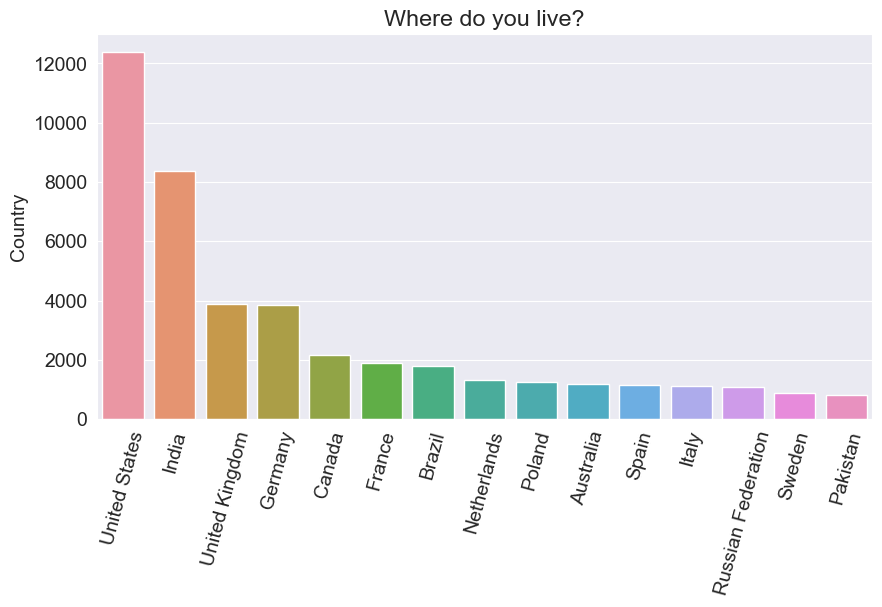

In [26]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

##### It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. 

## Age

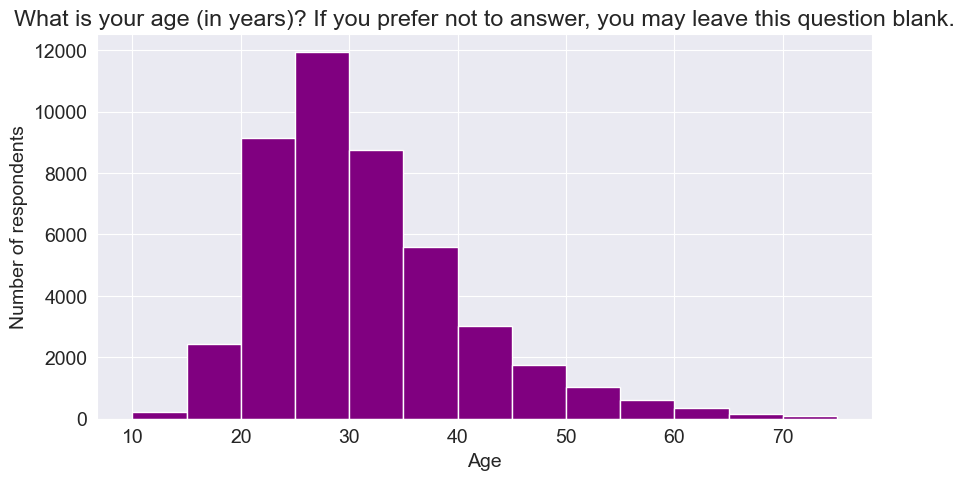

In [27]:
plt.figure(figsize=(10, 5))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

##### It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general

## Gender

In [28]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [29]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

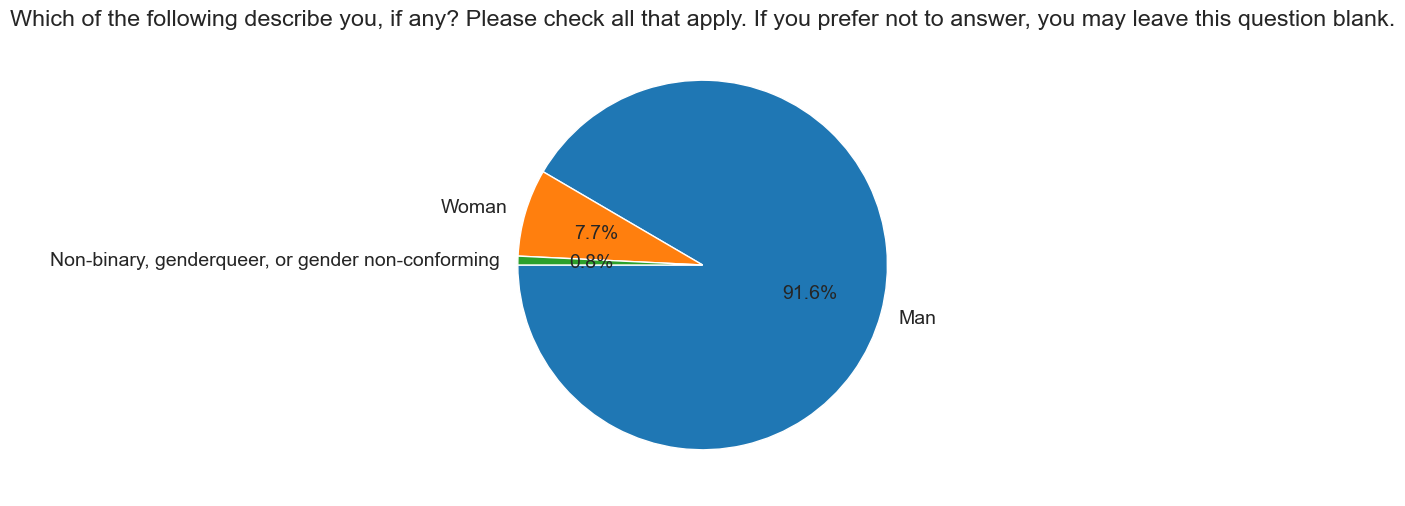

In [30]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

##### Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

## Education level

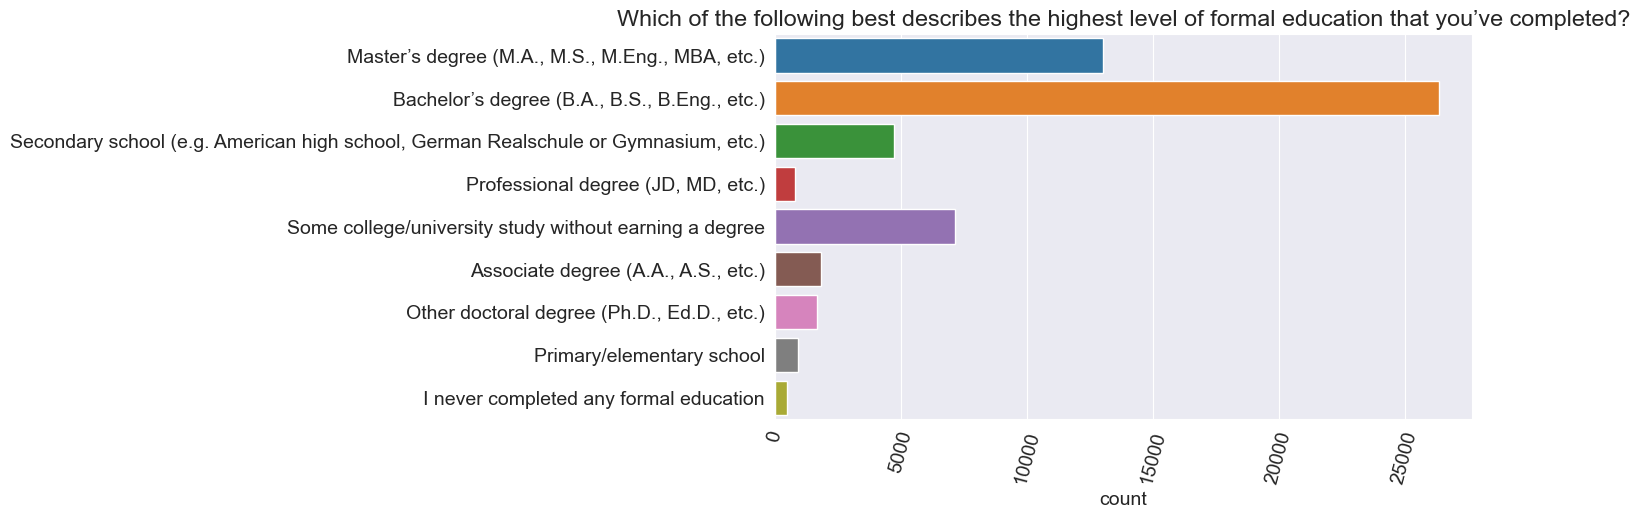

In [31]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

##### It appears that over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. 

In [32]:
schema.UndergradMajor

'What was your primary field of study?'

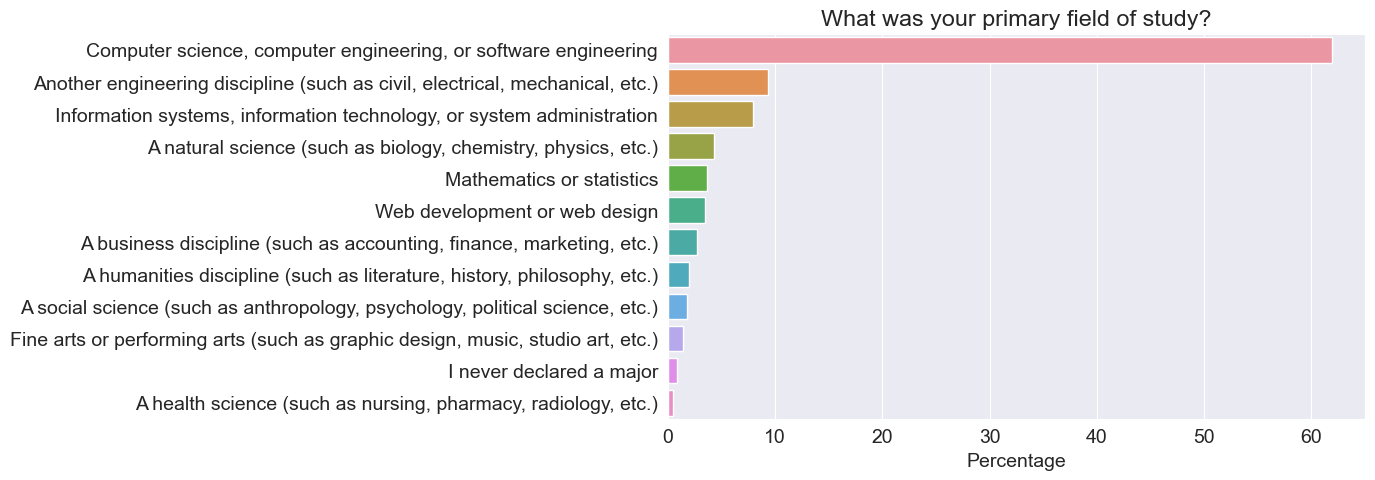

In [33]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

##### Close to 40% of programmers holding a college degree have a field of study other than computer science

## Employment

In [34]:
schema.Employment

'Which of the following best describes your current employment status?'

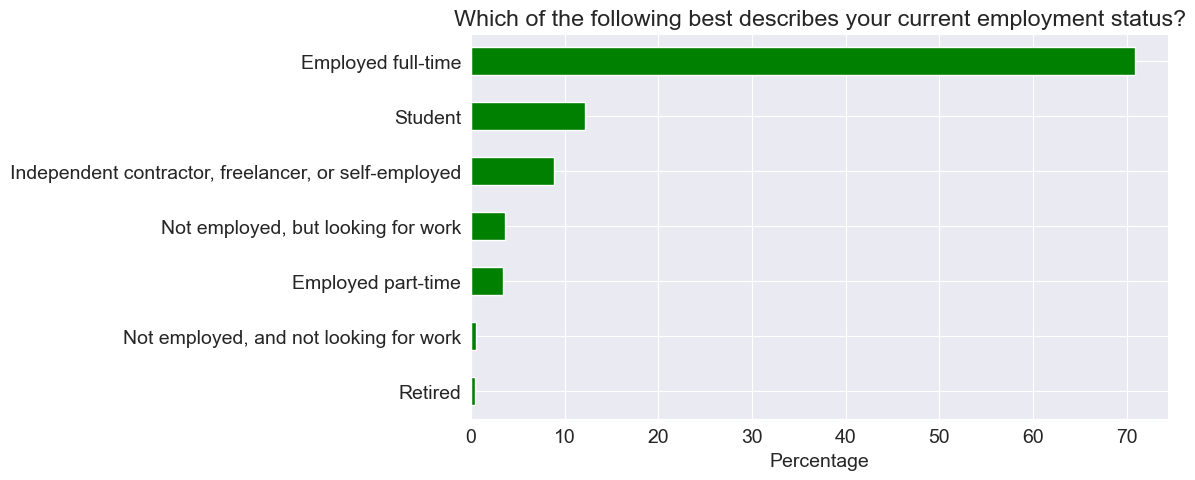

In [35]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

##### It appears that close to 10% of respondents are employed part time or as freelancers

In [36]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [37]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [38]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    
    for idx, value  in col_series[col_series.notnull()].items():
         for option in value.split(';'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
           
         result_df.at[idx, option] = True
    return result_df[options]

In [39]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [40]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            13004
Developer, mobile                                 5652
System administrator                              5185
Developer, back-end                               3571
Developer, front-end                              2602
DevOps specialist                                 2471
Engineer, data                                    2076
Developer, QA or test                             1709
Scientist                                         1622
Developer, desktop or enterprise applications     1538
Engineering manager                               1491
Product manager                                   1455
Educator                                          1417
Developer, embedded applications or devices        957
Senior executive/VP                                894
Developer, game or graphics                        890
Engineer, site reliability                         800
Data scientist or machine learning specialist      663
Data or bu

##### The most common roles is "Developer" 

In [42]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [43]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [44]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

SQL                      29.902342
TypeScript               21.047803
Python                   10.249432
VBA                       5.394520
JavaScript                4.853357
Swift                     3.554878
PHP                       2.310826
Java                      2.016919
Rust                      1.615712
Ruby                      1.335801
R                         1.121202
Kotlin                    1.074550
C++                       0.925264
Scala                     0.828850
C#                        0.803969
HTML/CSS                  0.458744
C                         0.230150
Perl                      0.181943
Objective-C               0.172612
Go                        0.161727
Bash/Shell/PowerShell     0.097969
Dart                      0.074643
Haskell                   0.045097
Julia                     0.038877
Assembly                  0.035766
dtype: float64

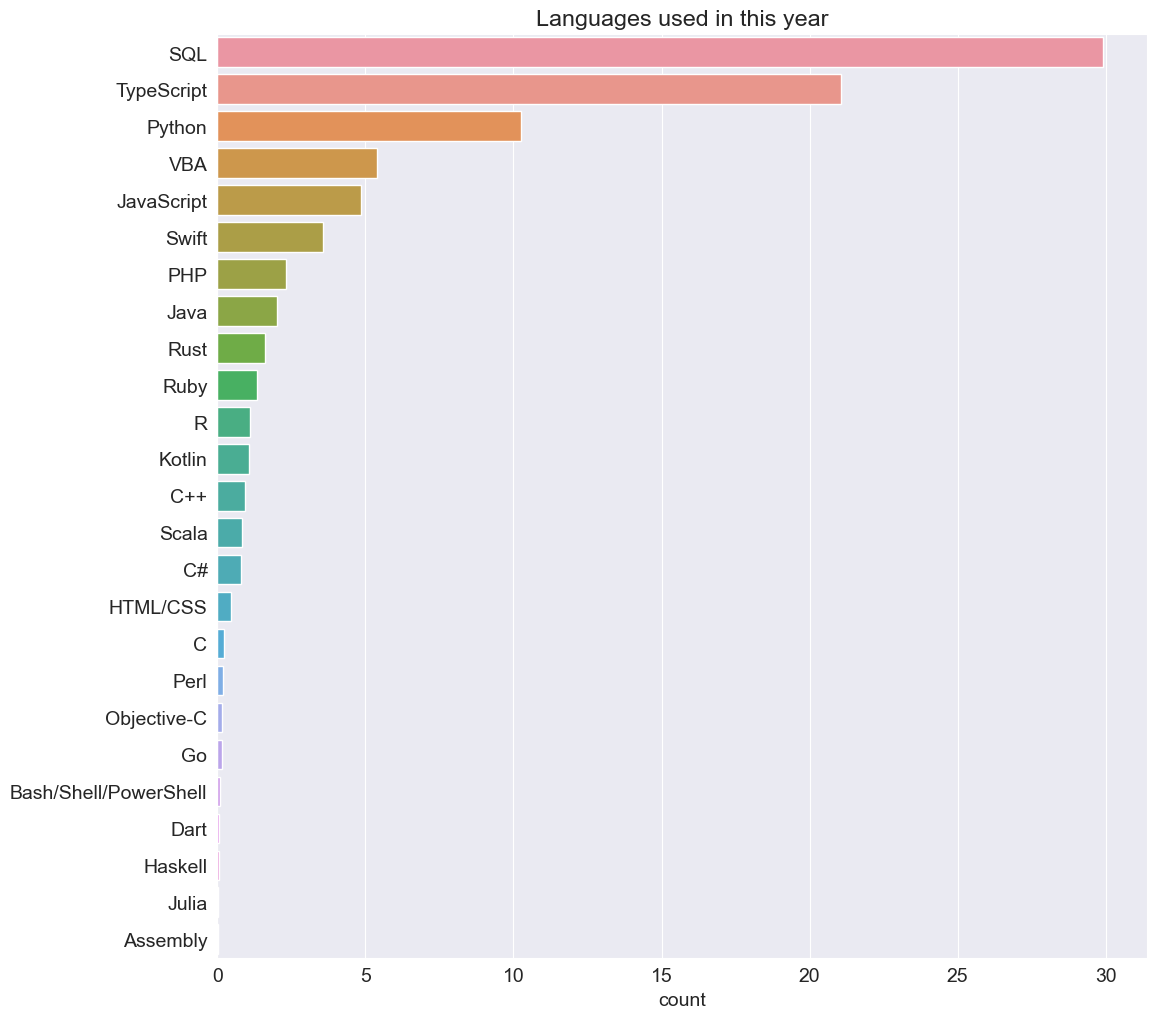

In [49]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in this year");
plt.xlabel('count');

##### SQL is the most used language used for RDBMS. 

In [47]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

TypeScript               25.916711
SQL                      16.928436
Python                   10.672410
Rust                      6.644792
Swift                     5.562467
JavaScript                2.719808
Scala                     2.080677
Kotlin                    1.802320
VBA                       1.611047
R                         1.522408
Ruby                      1.486642
Java                      1.149193
PHP                       1.035673
Go                        0.989021
C++                       0.881722
C#                        0.842845
Dart                      0.321898
Haskell                   0.264361
HTML/CSS                  0.244145
Julia                     0.217709
C                         0.153951
Objective-C               0.143066
Perl                      0.122850
Bash/Shell/PowerShell     0.111965
Assembly                  0.062203
dtype: float64

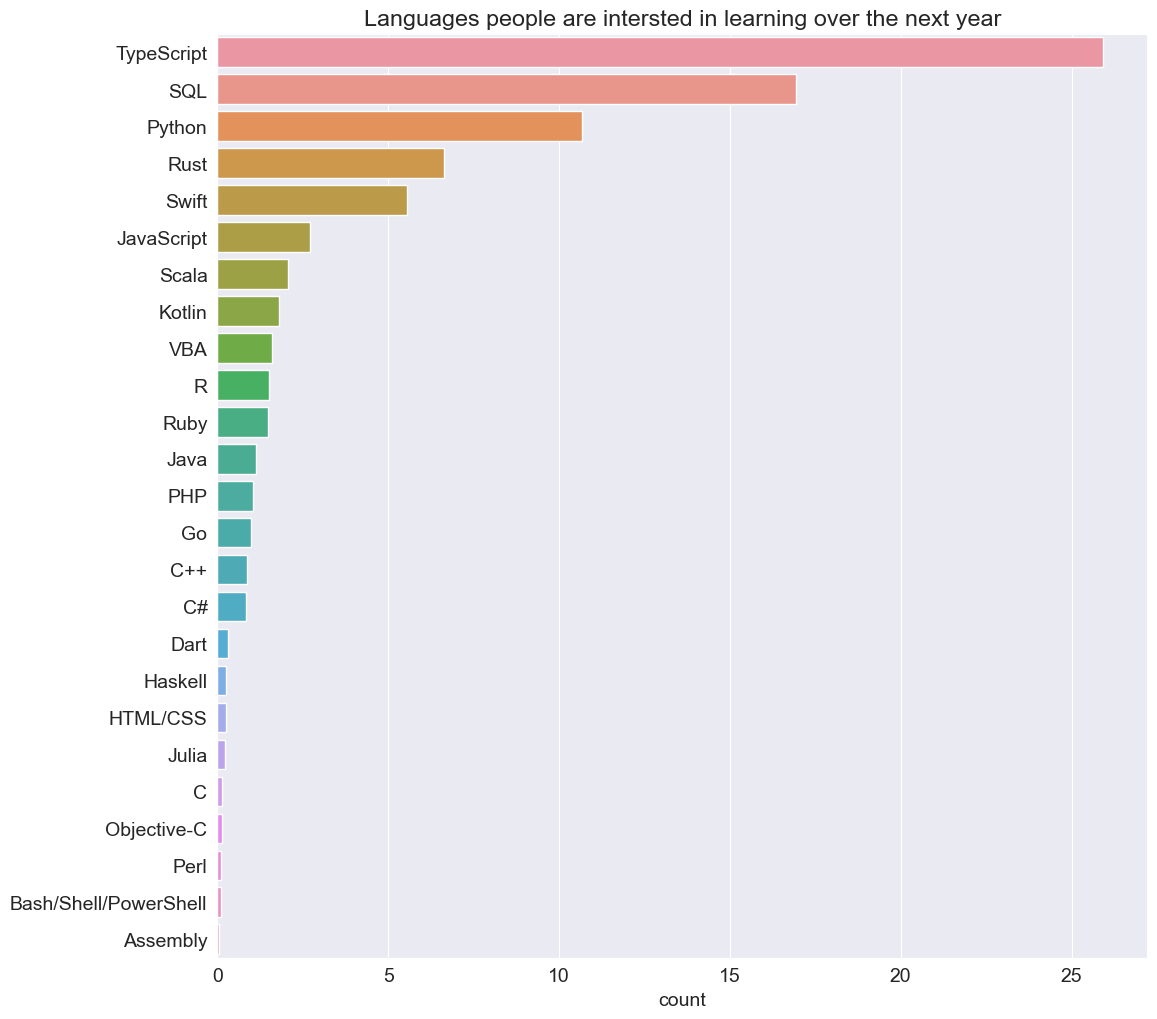

In [48]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

##### Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains

# Conclusions

### I've drawn many inferences from the survey. Here's a summary of a few of them:

#####  1. Based on the survey respondents' demographics, I can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

#####  2. The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

##### 3.SQL ,Typescript ,Python are some of the most used programming languages in 2020.

##### 4.Typescript , SQL , Python are some of the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.